# iSCAT Analysis Demo

This notebook demonstrates the analysis of multiple tracks at once using the `ListOfTracks` class.

In [1]:
from iscat_lib.analysis import ListOfTracks

Load the tracks from some example data. We can use `tracks.normalize` to set the initial time value of all tracks to 0.

In [2]:
tracks = ListOfTracks.from_file("../examples/more test data/180912 20nm GoldNP on 75DOPC25Chol (2kHz 100pc power)_Position_converted.csv", unit_length='micrometres')
tracks.normalize(normalize_t = True, normalize_xy = False)

We can plot all trajectories:

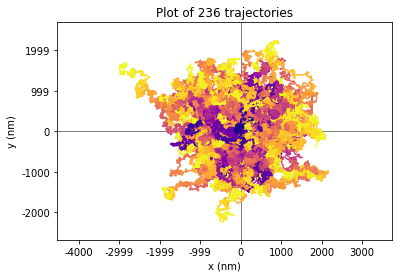

In [3]:
tracks.plot_trajectories()

Use ADC analysis on all tracks in bulk. This will calculate the MSD and D_app of all tracks and the perform model fits.

Since we're analyzing many tracks this can take a few minutes.

In [4]:
tracks.adc_analysis(maxfev=10000)

c:\users\john\projekte\iscat_analysis\iscat_lib\analysis.py:1104: UserWarning: Track is not very long, switching to single worker as this will probably be faster than setting up the process pool. Use num_workers = 1 to suppress this warning.
  warnings.warn("Track is not very long, switching to single worker as "
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis.py:344: UserWarning: ADC analysis failed for 4/236 tracks. Consider raising the maximum function evaluations using the maxfev keyword argument. To get a more detailed stacktrace, run the ADC analysis for a single track.
  "for a single track.".format(len(list_failed), len(self.__tracks)))


[2, 30, 176, 208]

`tracks.adc_analysis` returns a list of tracks for which the analysis failed. This is most likely due to the fits not converging in time. We can either run `adc_analysis` again with a higher value for `maxfev` or perform the analysis "manually" on the remaining tracks using `get_track`.

We'll only do this for one track here as it can take a while and may not actually yield good results.

In [5]:
tracks.get_track(2).adc_analysis(maxfev=100000)

{'analyzed': True,
 'model': 'hop',
 'Dapp': array([8.65476397e-13, 4.96143525e-13, 3.56496015e-13, ...,
        1.30690431e-13, 1.25918360e-13, 1.26295861e-13]),
 'results': {'brownian': {'params': array([2.29417018e-13, 1.55670883e-08]),
   'errors': array([1.75315236e-15, 3.73404317e-09]),
   'bic': -55.57913562439181,
   'rel_likelihood': 0.7494212972764708},
  'confined': {'params': array([1.05403520e-11, 9.53044717e-08, 0.00000000e+00]),
   'errors': array([0.00000000e+00, 8.41054067e-09, 2.09827195e+01]),
   'bic': -51.737841910082025,
   'rel_likelihood': 0.10979933228949396},
  'hop': {'params': array([2.29423194e-13, 1.58720479e-13, 3.41432971e-09, 5.14481011e-03]),
   'errors': array([2.26918163e-15, 1.70185968e-13, 2.72683093e-08, 4.85964443e-03]),
   'bic': -56.15604357223672,
   'rel_likelihood': 1.0},
  'n_points': 387,
  'R': 0.16666666666666666}}

`tracks.summary` averages the fit parameters, MSD and D_app by classified model. We have to specify `interpolation = True` since the time step sizes are not uniform across tracks. We can also specify whether `tracks.summary` should produce plots.

Tracks that have not yet been analyzed will be ignored.

c:\users\john\projekte\iscat_analysis\iscat_lib\analysis.py:483: RuntimeWarning: invalid value encountered in true_divide
  average_D_app_hop /= sampled_hop
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis.py:484: RuntimeWarning: invalid value encountered in true_divide
  average_MSD_hop /= sampled_hop


{'sector_brownian_area': 0.630901287553648,
 'sector_confined_area': 0.0,
 'sector_hop_area': 0.36909871244635195,
 'average_params': {'brownian': array([5.05166932e-12, 5.38659557e-06]),
  'confined': None,
  'hop': array([5.76351743e-12, 1.09436533e-08, 1.84332041e-06, 1.25135408e+00])},
 'average_msd': {'brownian': array([1.83059021e-15, 2.89184479e-15, 3.93469888e-15, ...,
         7.21926253e-13, 6.93783575e-13, 6.71380917e-13]),
  'confined': None,
  'hop': array([2.06784758e-15, 3.72210570e-15, 5.31160439e-15, ...,
                    nan,            nan,            nan])},
 'average_dapp': {'brownian': array([1.70775432e-13, 1.01772035e-13, 8.41526156e-14, ...,
         1.00401404e-14, 9.64633318e-15, 9.33251206e-15]),
  'confined': None,
  'hop': array([2.53777912e-13, 1.40821879e-13, 1.20207590e-13, ...,
                    nan,            nan,            nan])}}

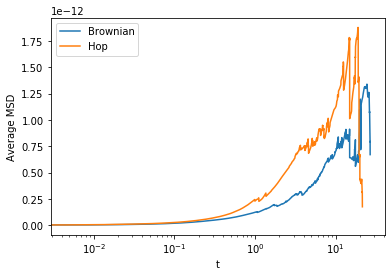

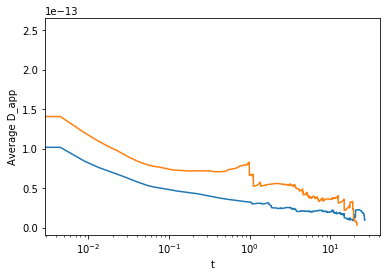

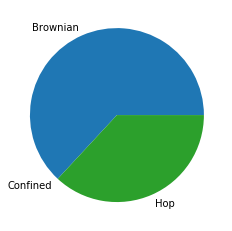

In [6]:
tracks.summary(interpolation = True, plot_dapp = True, plot_msd = True, plot_pie_chart = True)

Let's also perform MSD analysis. This should be a lot faster since the MSD is already calculated for each track.

In [7]:
tracks.msd_analysis()

[]

We can now plot the MSD analyis results of single tracks:

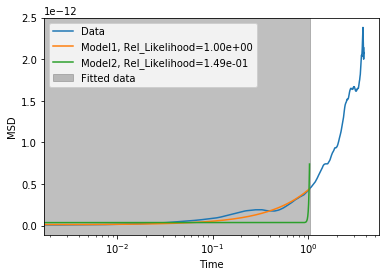

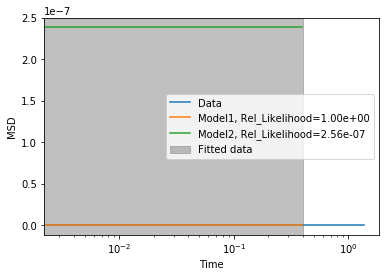

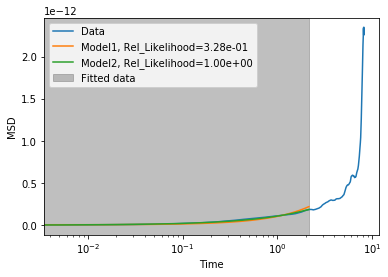

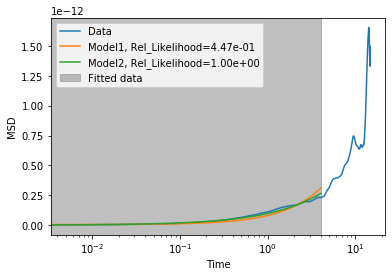

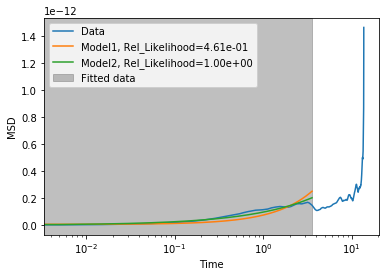

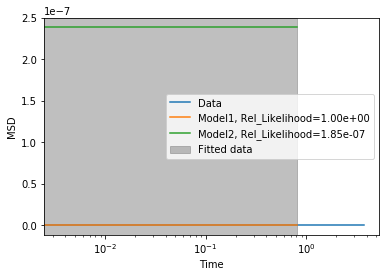

In [8]:
tracks.get_track(4).plot_msd_analysis_results()
tracks.get_track(8).plot_msd_analysis_results()
tracks.get_track(15).plot_msd_analysis_results()
tracks.get_track(16).plot_msd_analysis_results()
tracks.get_track(23).plot_msd_analysis_results()
tracks.get_track(42).plot_msd_analysis_results()

We can do the same for the ADC analysis results:

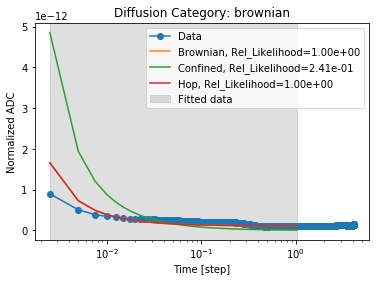

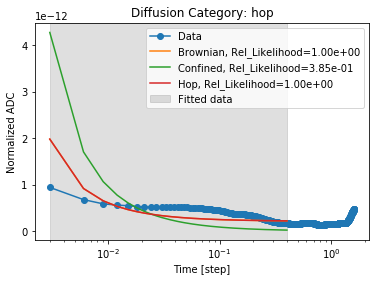

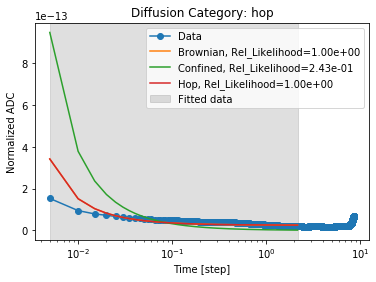

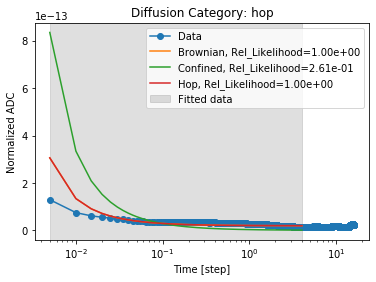

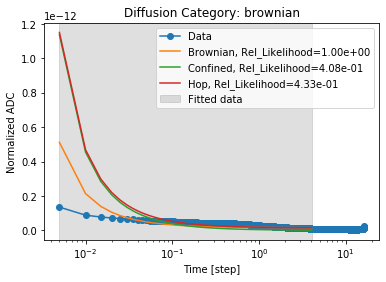

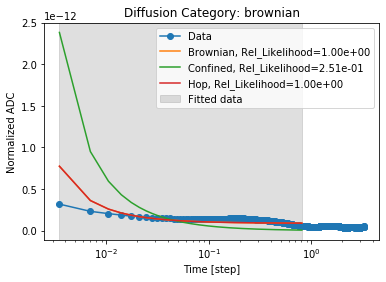

In [9]:
tracks.get_track(4).plot_adc_analysis_results()
tracks.get_track(8).plot_adc_analysis_results()
tracks.get_track(15).plot_adc_analysis_results()
tracks.get_track(16).plot_adc_analysis_results()
tracks.get_track(23).plot_adc_analysis_results()
tracks.get_track(42).plot_adc_analysis_results()

It is also possible to retreive the lists of tracks that have been classified as a specific model using a specified method:

In [10]:
tracks_brownian = tracks.get_sublist(method='adc', model='brownian')
tracks_hop = tracks.get_sublist(method='adc', model='hop')

We can now again plot the trajectories, but divided by the diffusion model:

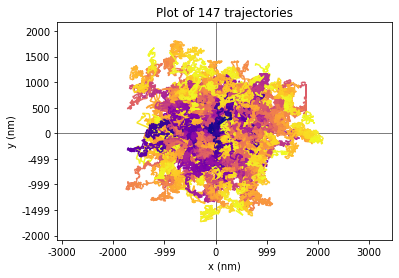

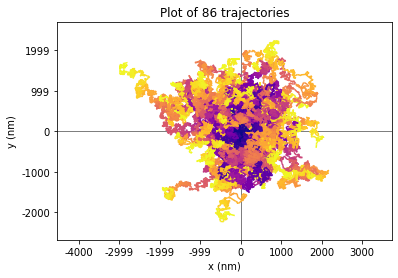

In [11]:
tracks_brownian.plot_trajectories()
tracks_hop.plot_trajectories()

The summary will now contain only the corresponding diffusion model:

{'sector_brownian_area': 0.0,
 'sector_confined_area': 0.0,
 'sector_hop_area': 1.0,
 'average_params': {'brownian': None,
  'confined': None,
  'hop': array([5.76351743e-12, 1.09436533e-08, 1.84332041e-06, 1.25135408e+00])},
 'average_msd': {'brownian': None,
  'confined': None,
  'hop': array([2.06784758e-15, 3.36633700e-15, 4.63829975e-15, ...,
         2.00657711e-13, 1.73392776e-13, 1.83812008e-13])},
 'average_dapp': {'brownian': None,
  'confined': None,
  'hop': array([2.53777912e-13, 1.52111733e-13, 1.27546712e-13, ...,
         3.58795736e-15, 3.09965754e-15, 3.28509486e-15])}}

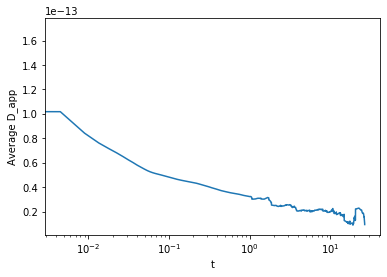

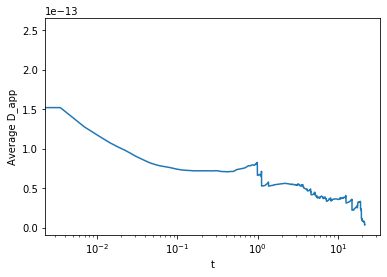

In [12]:
tracks_brownian.summary(interpolation=True, plot_dapp=True)
tracks_hop.summary(interpolation=True, plot_dapp=True)

More demonstration and tutorial notebooks can be found in this directory or in the built documentation. 